In [1]:
!pip install kaggle

In [2]:
! copy G:\Important\kaggle.json C:\Users\manda\.kaggle\

        1 file(s) copied.


In [3]:
!kaggle competitions download -c speech-based-classification-layer-9

speech-based-classification-layer-9.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!dir .\

 Volume in drive C has no label.
 Volume Serial Number is 5200-3D35

 Directory of C:\Users\manda\KaggleCompetition

09/22/2023  05:30 PM    <DIR>          .
09/22/2023  05:30 PM    <DIR>          ..
09/22/2023  03:33 PM    <DIR>          .ipynb_checkpoints
09/22/2023  05:30 PM            61,680 190438H_label_1_layer_9.ipynb
09/03/2023  03:11 PM       213,080,891 speech-based-classification-layer-9.zip
09/03/2023  03:10 PM        11,102,887 test.csv
09/03/2023  03:10 PM       454,263,141 train.csv
09/03/2023  03:11 PM        11,955,497 valid.csv
               5 File(s)    690,464,096 bytes
               3 Dir(s)  116,231,868,416 bytes free


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("./train.csv")
valid = pd.read_csv("./valid.csv")

In [4]:
# drop label_2, label_3 and label_4
dropping_labels = ["label_2","label_3", "label_4"]
train.drop(dropping_labels, axis=1, inplace= True)
valid.drop(dropping_labels, axis=1, inplace= True)

In [5]:
# check whether any missing values in the train set
train.columns[train.isnull().any()]

Index([], dtype='object')

In [6]:
# splitting features and the label
x_train = train.drop(["label_1"], axis=1)
y_train = train["label_1"]
x_valid = valid.drop(["label_1"], axis=1)
y_valid = valid["label_1"]

In [10]:
# Import necessary libraries
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=1.9)

# Train the SVM classifier on the training data
clf.fit(x_train, y_train)\

# Make predictions on the test data
y_pred = clf.predict(x_valid)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9733333333333334


In [12]:
# Import necessary libraries
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=2.0)

# Train the SVM classifier on the training data
clf.fit(x_train, y_train)\

# Make predictions on the test data
y_pred = clf.predict(x_valid)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9733333333333334


In [13]:
# check for minimum variance
print("Minimum variance found is: ",x_train.describe().loc['std'].min()**2)

Minimum variance found is:  0.0015264596522753114


In [14]:
x_train.describe().loc["std"]

feature_1      0.048122
feature_2      0.047099
feature_3      0.059531
feature_4      0.056354
feature_5      0.062569
                 ...   
feature_764    0.055990
feature_765    0.055413
feature_766    0.082085
feature_767    0.070793
feature_768    0.059617
Name: std, Length: 768, dtype: float64

In [15]:
def variance_treshould_invf(X):
    should_drop = []
    stds = X.describe().loc["std"]
    max_variance = max(stds)**2
    for i in range(0, len(stds)):
        if (stds[i]**2)< (0.002):
            should_drop.append(f"feature_{i+1}")
    return should_drop
        

In [16]:
should_drop = variance_treshould_invf(x_train)
len(should_drop)

12

In [17]:
vx_train = x_train.drop(columns=should_drop,axis=1)
vx_valid = x_valid.drop(columns=should_drop,axis=1)

In [18]:
# Import necessary libraries
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=2.0)

# Train the SVM classifier on the training data
clf.fit(vx_train, y_train)\

# Make predictions on the test data
y_pred = clf.predict(vx_valid)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9693333333333334


In [19]:
# The bellow function returns all the co-related features
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>= threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [20]:
correlation(vx_train, 0.85)

{'feature_366', 'feature_609'}

In [21]:
cvx_train = vx_train.drop(columns={'feature_366', 'feature_609'}, axis=1)
cvx_valid = vx_valid.drop(columns={'feature_366', 'feature_609'}, axis=1)

In [22]:
# Import necessary libraries
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=2.0)

# Train the SVM classifier on the training data
clf.fit(cvx_train, y_train)\

# Make predictions on the test data
y_pred = clf.predict(cvx_valid)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9693333333333334


In [23]:
# define the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit the scaler
scvx_train = pd.DataFrame(scaler.fit_transform(cvx_train), columns=cvx_train.columns)
scvx_valid = pd.DataFrame(scaler.transform(cvx_valid), columns=cvx_valid.columns)

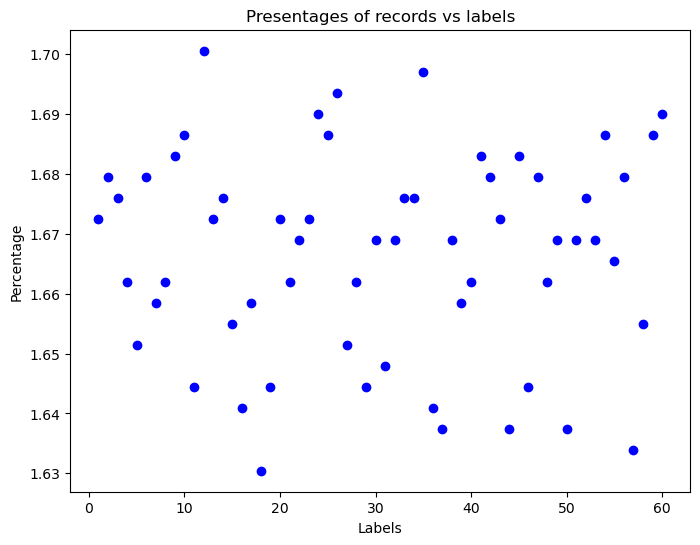

In [24]:
label_counts = train['label_1'].value_counts()
tot_records = len(train)
percentages = {}
for index, count in label_counts.items():
  percentages[index] = (count/tot_records)*100

lbls = []
ptages = []
for key, value in sorted(percentages.items()):
  lbls.append(key)
  ptages.append(value)

# Create a scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size (width, height)

plt.scatter(lbls, ptages, color='blue', marker='o', label='Data Points')  # Create scatter plot
plt.title('Presentages of records vs labels')  # Set the title of the plot
plt.xlabel('Labels')  # Set the label for the x-axis
plt.ylabel('Percentage')  # Set the label for the y-axis

plt.show()  # Display the plot

In [25]:
# Import necessary libraries
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=2.0)

# Train the SVM classifier on the training data
clf.fit(scvx_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(scvx_valid)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9573333333333334


In [31]:
# define the pca
from sklearn.decomposition import PCA
pca = PCA(, svd_solver="full")

pscvx_train = pca.fit_transform(scvx_train)
pscvx_valid = pca.transform(scvx_valid)

TypeError: PCA.__init__() got an unexpected keyword argument 'variance_treshould_invf'

In [27]:
# Import necessary libraries
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=2.0)

# Train the SVM classifier on the training data
clf.fit(pscvx_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(pscvx_valid)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9506666666666667


In [29]:
# Import necessary libraries
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create an SVM classifier
clf = svm.SVC(kernel='linear', C=2.0, class_weight="balanced")

# Train the SVM classifier on the training data
clf.fit(pscvx_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(pscvx_valid)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_valid, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9506666666666667


In [30]:
clf = svm.SVC(kernel='linear', C=2.0, class_weight="balanced")

In [11]:
df = pd.read_csv("./train.csv")
val = pd.read_csv("./valid.csv")

In [13]:
val.columns[df.isnull().any()]

Index(['label_2'], dtype='object')

# check for minimum variance
print("Minimum variance found is: ",x_train.describe().loc['std'].min()**2)